In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = "Model_Comparison_Cosine_Projection_Resuls.csv"  
df = pd.read_csv(file_path)

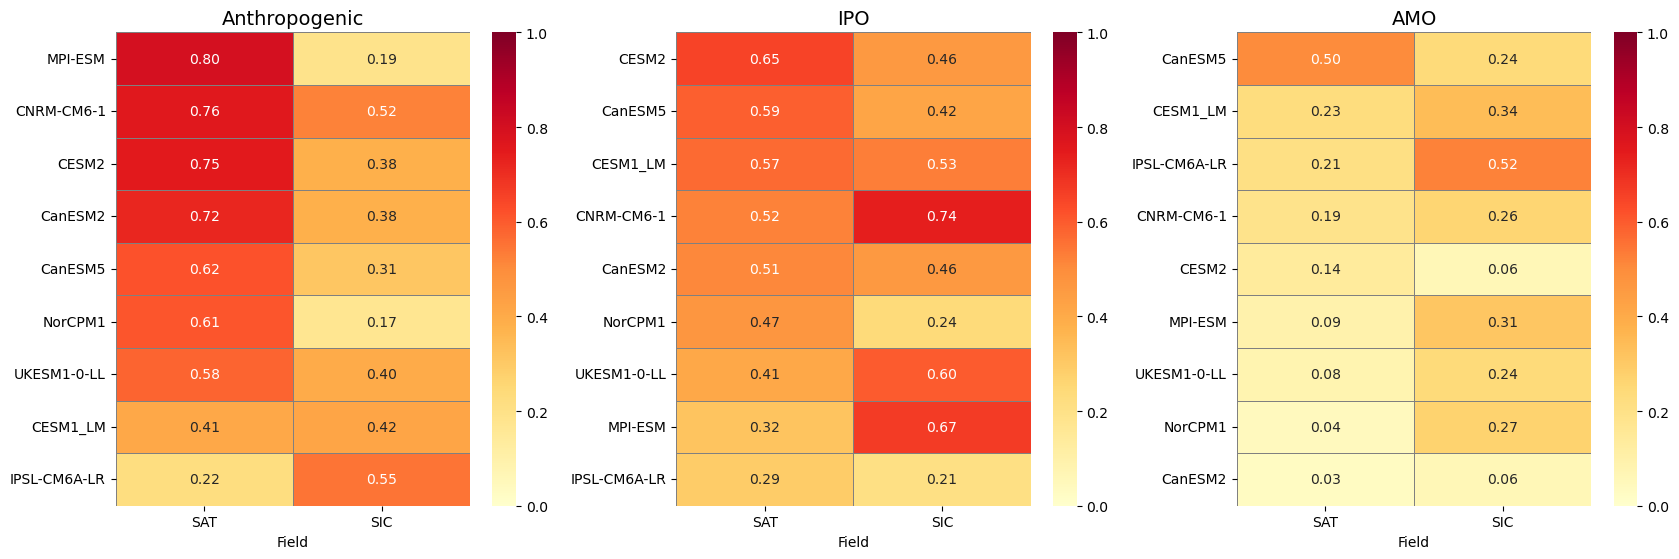

In [3]:
patterns = ["CO2", "IPO", "AMO"]
titles = ["Anthropogenic", "IPO", "AMO"]
field_order = ["SAT", "SIC"]

#Plot
fig, axes = plt.subplots(1, 3, figsize=(17, 6), sharey=False)

for ax, pattern, title in zip(axes, patterns, titles):
    # Filter and sort by SAT
    subdf = df[df["Pattern"] == pattern].copy()
    subdf_sorted = subdf.sort_values("SAT", ascending=False)
    model_order = subdf_sorted["Model"].tolist()

    # Reshape for heatmap
    melted = subdf_sorted.melt(id_vars=["Model"], value_vars=field_order,
                                var_name="Field", value_name="Cosine")
    pivoted = melted.pivot(index="Model", columns="Field", values="Cosine").loc[model_order]

    # Plot heatmap
    sns.heatmap(pivoted, annot=True, fmt=".2f", cmap="YlOrRd", cbar=True,
                ax=ax, vmin=0, vmax=1, linewidths=0.5, linecolor='gray')

    ax.set_title(title, fontsize=14)
    ax.set_xlabel("Field")
    ax.set_ylabel("Model" if title == "1st Pair" else "")
    ax.tick_params(axis='y', labelrotation=0)


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("Figure5.jpg", dpi=600, bbox_inches='tight')
plt.show()